# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

578

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Add base url
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Temp in Fahrenheit
units = "Imperial"

# Create sets and records counter
sets = 1
records = 1

# Set up lists to hold response information (empty lists)
lat = []
lon = []
max_temp= []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_name = []

# # Begin Data Retrieval process..
# print('Start of Data Retrieval')
# print('----------------------------')

# Loop through each city and make API request
for city in cities:
    query = url + '&appid=' + weather_api_key + '&units=' + units + '&q='
    response = requests.get(query + city).json()
   
    # Try and except from list of cities given at random
    try:
        print(f'Processing Record {records} of Set {sets} | {city}')
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
    except:
        print(f'City not found, Skipping..')
        pass
    
    # Records/sets counter (by 45)
    records = records + 1
    if records == 45:
        records = 0 
        sets = sets + 1
# End data Retrieval Process
print('----------------------------')
print('End of Data Retrieval')
print('----------------------------')

Processing Record 1 of Set 1 | talakan
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | fare
Processing Record 7 of Set 1 | kudahuvadhoo
Processing Record 8 of Set 1 | henties bay
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | pangoa
Processing Record 12 of Set 1 | slave lake
Processing Record 13 of Set 1 | kasempa
Processing Record 14 of Set 1 | haverfordwest
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | chardara
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | salalah
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | attawapiskat
City not found, Skipping..
Processing Record 22 of Set 1 | constitucion
Processing Record 23 of Set 1 | east london
Processing Record 24 of Set 1 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Create Dataframe from above results
cities_df = pd.DataFrame({'City': city_name, 
                          'Lat': lat, 
                          'Lng': lon, 
                          'Max Temp': max_temp, 
                          'Humidity': humidity, 
                          'Cloudiness': cloudiness, 
                          'Wind Speed': wind_speed, 
                          'Country': country, 
                          'Date': date
                         })

# Export new Dataframe into a csv
cities_df.to_csv("../output_data/cities.csv", index=False)

# Read Dataframe with pandas for later use
file = os.path.join('..', 'output_data', 'cities.csv')
cities_df = pd.read_csv(file)

# Display the Dataframe
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talakan,50.3167,130.3667,-21.64,82,100,3.74,RU,1612130312
1,hobart,-42.8794,147.3294,64.99,63,75,8.05,AU,1612130029
2,kodiak,57.7900,-152.4072,32.00,40,1,4.61,US,1612129864
3,kapaa,22.0752,-159.3190,75.20,73,40,14.97,US,1612130312
4,rikitea,-23.1203,-134.9692,79.11,62,35,7.20,PF,1612129869


# Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [63]:
# Checking to see if there are any cities with humidity greater than 100 with search loc function
humidity_check = cities_df['Humidity'].loc[cities_df['Humidity'] > 100]
humidity_check # no cities over 100

Series([], Name: Humidity, dtype: int64)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

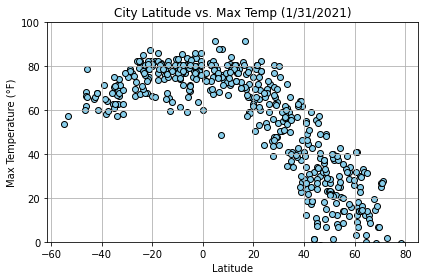

In [48]:
# Add in x and y values from cities Dataframe
x_values = cities_df['Lat']
y_values = cities_df['Max Temp']
degree_sym = u'\N{DEGREE SIGN}'

# Create scatter plot for lat vs. temp
plt.scatter(x_values, y_values, color='skyblue', edgecolors='black')

# Set labels and limits for scatter
plt.title('City Latitude vs. Max Temp (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel(f'Max Temperature ({degree_sym}F)')
plt.grid()
plt.ylim(0, 100)

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_Temp.png')

# Display scatter plot
plt.tight_layout()
plt.show()

The code above is displaying a graph of the relationship between latitude and temperatures in the randomly selected cities. '0' latitude (along the x-axis) depicts the equator line.

## Latitude vs. Humidity Plot

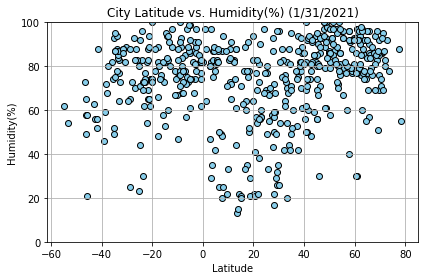

In [49]:
# Add in x and y values from cities Dataframe
x_values = cities_df['Lat']
y_values = cities_df['Humidity']

# Create scatter plot for lat vs. humidity
plt.scatter(x_values, y_values, color='skyblue', edgecolors='black')

# Set labels and limits for scatter
plt.title('City Latitude vs. Humidity(%) (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.ylim(0, 100)

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_Humidity.png')

# Display scatter plot
plt.tight_layout()
plt.show()

The code above is displaying a graph of the relationship between latitude and humidity percentages in the randomly selected cities. '0' latitude (along the x-axis) depicts the equator line.

## Latitude vs. Cloudiness Plot

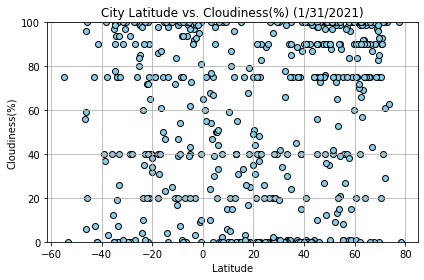

In [50]:
# Add in x and y values from cities Dataframe
x_values = cities_df['Lat']
y_values = cities_df['Cloudiness']

# Create scatter plot for lat vs. cloudiness
plt.scatter(x_values, y_values, color='skyblue', edgecolors='black')

# Set labels and limits for scatter
plt.title('City Latitude vs. Cloudiness(%) (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()
plt.ylim(0, 100)

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_Cloudiness.png')

# Display scatter plot
plt.tight_layout()
plt.show()

The code above is displaying a graph of the relationship between latitude and cloudiness percentages in the randomly selected cities. '0' latitude (along the x-axis) depicts the equator line.

## Latitude vs. Wind Speed Plot

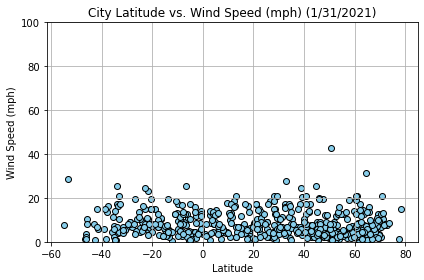

In [52]:
# Add in x and y values from cities Dataframe
x_values = cities_df['Lat']
y_values = cities_df['Wind Speed']

# Create scatter plot for lat vs. wind speed
plt.scatter(x_values, y_values, color='skyblue', edgecolors='black')

# Set labels and limits for scatter
plt.title('City Latitude vs. Wind Speed (mph) (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.ylim(0, 100)

# Save plot in output_data
plt.savefig('../output_data/Lat_vs_WindSpeed.png')

# Display scatter plot
plt.tight_layout()
plt.show()

The code above is displaying a graph of the relationship between latitude and wind speeds (mph) in the randomly selected cities. '0' latitude (along the x-axis) depicts the equator line.

## Linear Regression

In [92]:
# Locate Northern Hemisphere Latitude with loc search function
north_lat = cities_df.loc[cities_df['Lat'] >= 0, :] 

# Locate Southern Hemisphere Latitude with loc search funciton
south_lat = cities_df.loc[cities_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

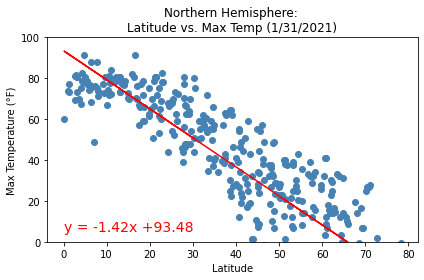

In [118]:
# Add in x and y values from Northern Hemisphere Dataframe
x_values = north_lat['Lat']
y_values = north_lat['Max Temp']
degree_sym = u'\N{DEGREE SIGN}'

# Perform a linear regression on lat vs temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress = slope * x_values + intercept

# String for line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create plot with lineregress for lat vs. temp
plt.scatter(x_values, y_values, color='steelblue')
plt.plot(x_values, regress, 'r-')

# Set labels and limits for scatter with annotation of line equation
plt.title('Northern Hemisphere: \nLatitude vs. Max Temp (1/31/2021)')
plt.xlabel('Latitude')
plt.ylabel(f'Max Temperature ({degree_sym}F)')
plt.ylim(0, 100)
plt.annotate(line_eq, (0,5), fontsize=14, color='red')

# Display scatter plot
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


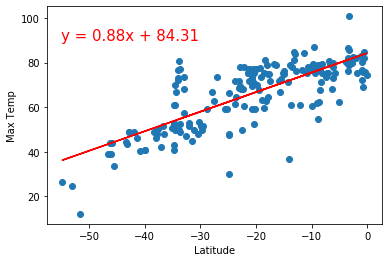

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


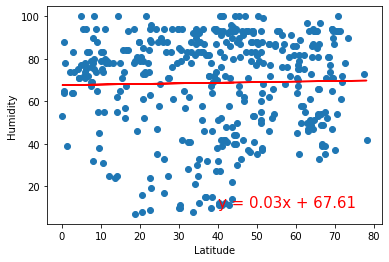

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


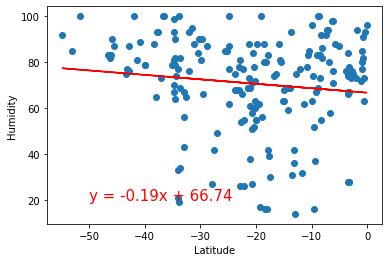

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


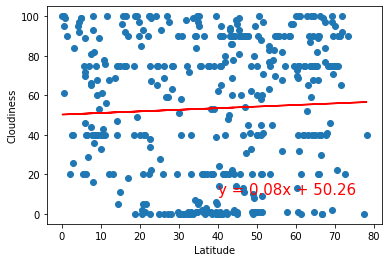

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


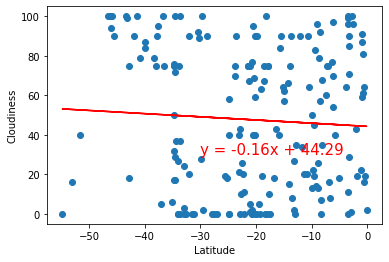

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


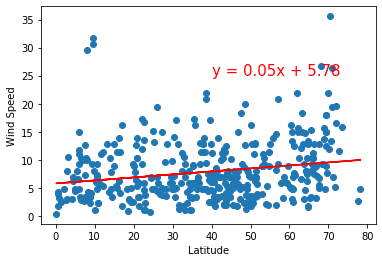

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


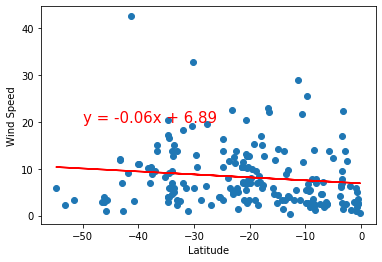